## Import modules and tools

In [1]:
import sys
sys.path.insert(0, '_libs/')

In [2]:
from __future__ import division, print_function

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.image as mpimg
import netCDF4 as nc
import NEMO_tools as Nts
import numpy as np
import scipy.io as sio
import pandas as pd


from salishsea_tools import nc_tools
from salishsea_tools import viz_tools
from matplotlib.pyplot import *

from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.basemap import Basemap

%matplotlib inline


In [3]:
reload(Nts)

NameError: name 'reload' is not defined

## Read NEMO_GYRE output data files

In [6]:
gridU = nc.Dataset('/ocean/mgrenier/geotraces/MyGyre/GYRE_MoveToLabSea/GYRE_5d_00010101_00011230_grid_U.nc')
gridV = nc.Dataset('/ocean/mgrenier/geotraces/MyGyre/GYRE_MoveToLabSea/GYRE_5d_00010101_00011230_grid_V.nc')
gridW = nc.Dataset('/ocean/mgrenier/geotraces/MyGyre/GYRE_MoveToLabSea/GYRE_5d_00010101_00011230_grid_W.nc')
gridT = nc.Dataset('/ocean/mgrenier/geotraces/MyGyre/GYRE_MoveToLabSea/GYRE_5d_00010101_00011230_grid_T.nc')

In [7]:
#nc_tools.show_dimensions(gridT)
#nc_tools.show_dataset_attrs(gridT)
#nc_tools.show_variable_attrs(gridT)

## Read *.nc files & calculate annual mean value

In [8]:
lon = gridT.variables['nav_lon'][:]
lat = gridT.variables['nav_lat'][:]
U = gridU.variables['vozocrtx'][:]
V = gridV.variables['vomecrty'][:]
W = gridW.variables['vovecrtz'][:]
sal = gridT.variables['vosaline'][:]
temp = gridT.variables['votemper'][:]
sst = gridT.variables['sosstsst'][:]
print(lon.shape,lat.shape,sal.shape)

(22, 32) (22, 32) (72, 31, 22, 32)


In [9]:
# annual mean: do an average over the 72 timestep
tempMean=np.mean(temp, axis=0)
sstMean=np.mean(sst, axis=0)
salMean=np.mean(sal, axis=0)
u_NE=np.mean(U, axis=0)
v_NW=np.mean(V, axis=0)
WMean=np.mean(W, axis=0)
print(salMean.shape)
print('Annual mean data size: {}'.format(tempMean.shape))
# correct the velocity <--------------------------------- ?
UMean=np.sqrt(1/2)*(u_NE-v_NW)
VMean=np.sqrt(1/2)*(u_NE+v_NW)

(31, 22, 32)
Annual mean data size: (31, 22, 32)


## GYRE model grid

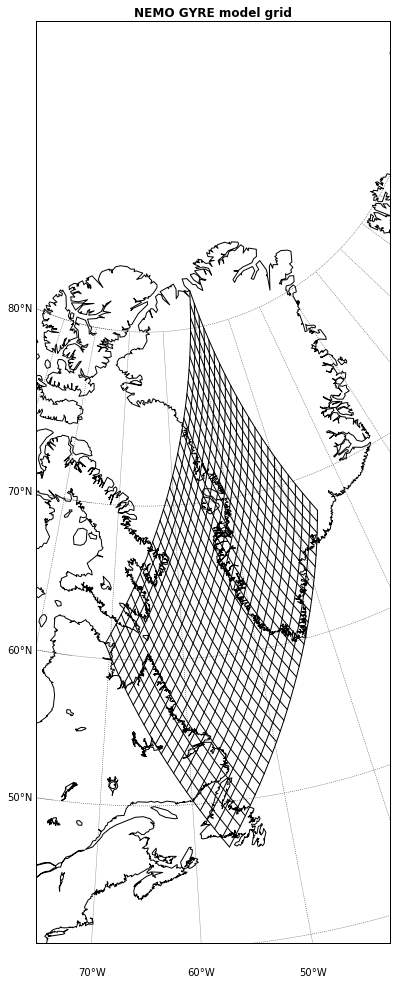

In [24]:
latlim=[40, 81]
lonlim=[-75, 75]
fig=plt.figure(figsize=(8, 16))
ax=fig.add_axes([0.1, 0.1, 0.8, 0.8])
proj=Basemap(projection='lcc',\
            lat_1=30, lat_2=60, lat_0=45, lon_0=-65,\
            llcrnrlon=lonlim[0], llcrnrlat=latlim[0],\
            urcrnrlon=lonlim[1], urcrnrlat=latlim[1],\
            resolution='l')
# draw coast line
proj.drawcoastlines(linewidth=1, color='k') #map.drawcountries, map.drawstates, map.fillcontinents
# draw parallels.
parallels = np.arange(-90, 91, 10)
proj.drawparallels(parallels, labels=[1, 0, 0, 0], color = '0.25',linewidth= 0.5, fontsize=10)
# draw meridians
meridians = np.arange(-180, 180, 10)
proj.drawmeridians(meridians, labels=[0, 0, 0, 1], color = '0.25',linewidth= 0.5, fontsize=10)
# transfer from Lat/Lon to projected grid
x, y=proj(lon, lat) 
proj.plot(x, y, color='k', linewidth=1)
proj.plot(x.T, y.T, color='k', linewidth=1)
ax.set_title('NEMO GYRE model grid', fontsize=12, fontweight='bold')
plt.show()
